# Supply Chain Analytics

## Exploratory Data Analysis (EDA)

In [1]:
#Load the cleaned data
import pandas as pd

df = pd.read_csv('cosmetics_supply_data_cleaned.csv')
df.head()

,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,...,location,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Correlation matrix

The "correlation coefficient" can be used to calculate the relationship between two quantitative variables.
To examine the relationship between the product type, customer demographics, shipping carriers, location, transportation modes, inspection results, routes, and the two target variables of inventory level and transport cost, we must first convert these object characteristics into the "int" type using the following library and code:

In [2]:
from sklearn import preprocessing

In [3]:
# Create the Labelencoder object
label_encoder = preprocessing.LabelEncoder()

In [4]:
#convert the categorical columns into numeric
df['product_type']= label_encoder.fit_transform(df['product_type'])
df['customer_demographics']= label_encoder.fit_transform(df['customer_demographics'])
df['shipping_carriers']= label_encoder.fit_transform(df['shipping_carriers'])
df['location']= label_encoder.fit_transform(df['location'])
df['sku']= label_encoder.fit_transform(df['sku'])
df['inspection_results']= label_encoder.fit_transform(df['inspection_results'])
df['transportation_modes']= label_encoder.fit_transform(df['transportation_modes'])
df['routes']= label_encoder.fit_transform(df['routes'])
df['supplier_name']= label_encoder.fit_transform(df['supplier_name'])

#### Select Features and Plot the Figure

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

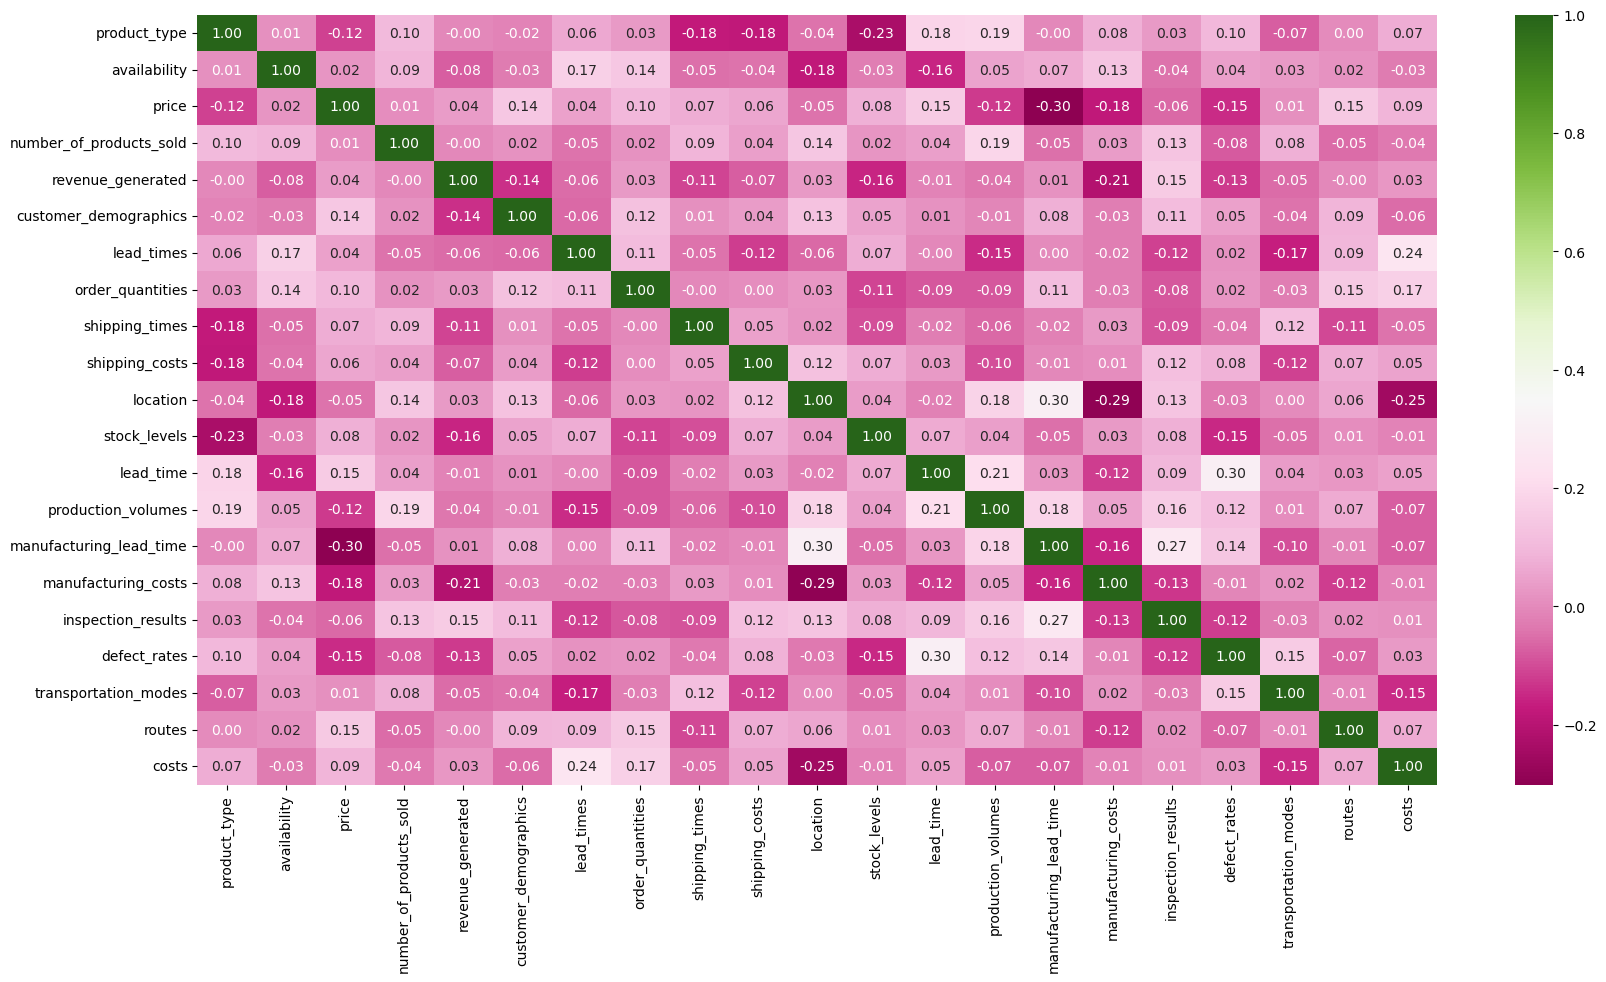

In [17]:
SC_features=df[['product_type','availability','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), annot = True, fmt = '.2f', cmap = "PiYG")